In [1]:
from mobilenetv3 import mobilenetv3
import json
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from custom_transforms import Normalize, ToTensor, RandomRotate, FixedResize, SortAxis

In [2]:
from torch.utils.data import Dataset

class DotsDataset(Dataset):
    def __init__(self, file, transform=None):
        with open(file,"rb") as fr:
            self.data = pickle.load(fr)
        self.transform = transform
        
    def __getitem__(self, idx):
        
        img_path = self.data[idx]['cropped_img_path']
        img = cv2.imread(img_path)
        box = self.data[idx]['cropped_box']
        target = np.array(box)
        
        sample = {'image':img, 'target':target}
        
        if self.transform:
            sample = self.transform(sample)
        
        return sample

    def __len__(self):
        return len(self.data)

In [10]:
def tr_transform(sample):
    composed_transforms = transforms.Compose([
                                        #
                                        RandomRotate(60.0),
                                        Normalize(),
                                        FixedResize((480,480)),
                                        # SortAxis(),
                                        ToTensor(),
                                        ])
    return composed_transforms(sample)

In [29]:
def val_transform(sample):
    composed_transforms = transforms.Compose([
                                        Normalize(),
                                        # RandomRotate(30.0),
                                        FixedResize((480,480)),
                                        # SortAxis(),
                                        ToTensor(),
                                        ])
    return composed_transforms(sample)

In [6]:
## dataset test
dataset = DotsDataset("crop_data_fixed.pickle", tr_transform)

In [7]:
len(dataset)

646

(224, 224, 3)


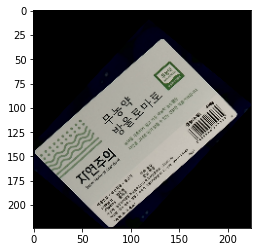

[[  1 146]
 [ 79 223]
 [209 106]
 [131  29]]


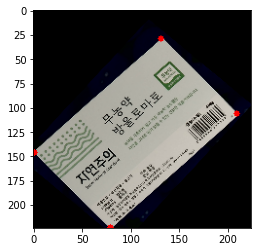

In [8]:
## dataset test
sample = dataset[1]
image_, target_ = sample['image'], sample['target']

image_ = image_.permute(1,2,0).mul(255).cpu().numpy().astype(np.uint8)
print(image_.shape)
target_[::2] = target_[::2]*image_.shape[1]
target_[1::2] = target_[1::2]*image_.shape[0]

plt.imshow(image_)
plt.show()
target_ = target_.cpu().numpy().astype(np.uint16)
target_ = np.reshape(target_,(4,2))
print(target_)
for b in target_:
    cv2.line(image_, tuple(b), tuple(b), (255,0,0) , 5)
plt.imshow(image_)
plt.show()

In [33]:
## pickle test
with open("crop_data_fixed.pickle","rb") as fr:
    data = pickle.load(fr)

(721, 1111, 3)
[[ 141   68]
 [  93  634]
 [1007  711]
 [1055  146]]


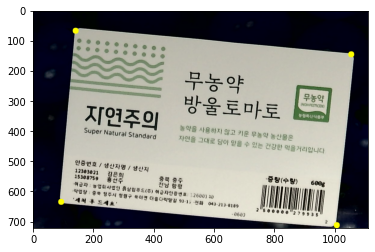

In [34]:
## pickle test
img_path = data[0]['cropped_img_path']
img = cv2.imread(img_path)
box = data[0]['cropped_box']
target = np.array(box)
print(img.shape)
print(target)
for b in target:
    cv2.line(img, tuple(b), tuple(b), (255,255,0) , 20)
plt.imshow(img)
plt.show()


In [1]:
import torchvision
from torchvision import models
import torch.nn as nn
# net_small = models.mobilenet_v2(pretrained=True)
model = torchvision.models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(512, 8)
# model.to(device)
# optimizer = torch.optim.Adam(model.parameters())

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [11]:
net_small.fc = nn.Linear(2048,8)

In [12]:
model_list = [net_small, 

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [47]:
net_small.classifier = nn.Sequential(
                                        nn.Dropout(p=0.2),    # refer to paper section 6
                                        nn.Linear(1280, 8),
                                    )

In [32]:
## train load

import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import Dataset, Subset, DataLoader
from torchvision import datasets
import torchvision
### parameters ###
file = 'crop_data_fixed.pickle'
batch_size = 32
lr = 0.001
epoch_num = 200
##################

dataset = DotsDataset(file, tr_transform)
dataset_test = DotsDataset(file, val_transform)

slice = int(len(dataset)*0.8)
indices = torch.randperm(len(dataset)).tolist()
train_data, test_data = Subset(dataset, indices[:slice]), Subset(dataset_test, indices[slice:])
data_loader_train = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
data_loader_test = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)


criterion = torch.nn.MSELoss()
# torch.manual_seed(777)

if torch.cuda.is_available():
    device = 'cuda'
    # torch.cuda.manual_seed_all(777)
else:
    device = 'cpu'
# model.to(device)
criterion.to(device)

iter_num = 0
batch_num = len(data_loader_train)

In [33]:
import timm
import torch.nn as nn
# timm.list_models('tf_efficientnet_b7_ns')
# model = timm.create_model('efficientnet_b7', pretrained=True)
model = timm.create_model('efficientnet_b0', pretrained=True)

In [34]:
dataset[0]['image'].shape

torch.Size([3, 480, 480])

In [35]:
model

EfficientNet(
  (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SiLU(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (gate): Sigmoid()
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
   

In [36]:
model.classifier = nn.Linear(in_features=1280, out_features=8, bias=True)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
# efficientv2

In [37]:
## train
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.8)

for epoch in range(epoch_num):
    model.train()
    avg_loss = 0
    for i, data in enumerate(data_loader_train):
        iter_num+=1
        
        img, target = data['image'], data['target']
        img = img.to(device)
        target = target.to(device)
#         img_v = Variable(img, requires_grad=False)
#         target_v = Variable(target, requires_grad=False)
        
        optimizer.zero_grad()
        result = model(img)
        # print(result, target)
        # print(target)
        loss = criterion(result, target)
        
        loss.backward()
        optimizer.step()
        
        avg_loss += loss / batch_num
    print(f"epoch:{epoch} avg_loss:{avg_loss} lr:{scheduler.get_last_lr()}")
    
    scheduler.step()
        # print(f"iter:{iter_num} loss:{loss}")

epoch:0 avg_loss:0.10354764759540558 lr:[0.001]
epoch:1 avg_loss:0.05427073314785957 lr:[0.001]
epoch:2 avg_loss:0.041144344955682755 lr:[0.001]
epoch:3 avg_loss:0.03532475605607033 lr:[0.001]
epoch:4 avg_loss:0.034218933433294296 lr:[0.001]
epoch:5 avg_loss:0.027435539290308952 lr:[0.001]
epoch:6 avg_loss:0.02048584446310997 lr:[0.001]
epoch:7 avg_loss:0.022941330447793007 lr:[0.001]
epoch:8 avg_loss:0.02658039703965187 lr:[0.001]
epoch:9 avg_loss:0.022444870322942734 lr:[0.001]
epoch:10 avg_loss:0.021847110241651535 lr:[0.001]
epoch:11 avg_loss:0.016194859519600868 lr:[0.001]
epoch:12 avg_loss:0.015113230794668198 lr:[0.001]
epoch:13 avg_loss:0.015398018062114716 lr:[0.001]
epoch:14 avg_loss:0.013671151362359524 lr:[0.001]
epoch:15 avg_loss:0.010770052671432495 lr:[0.0008]
epoch:16 avg_loss:0.010808567516505718 lr:[0.0008]
epoch:17 avg_loss:0.011755221523344517 lr:[0.0008]
epoch:18 avg_loss:0.01266127172857523 lr:[0.0008]
epoch:19 avg_loss:0.013758095912635326 lr:[0.0008]
epoch:20 av

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/yolor/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-e88ce64fad50>", line 23, in <module>
    optimizer.step()
  File "/home/ubuntu/anaconda3/envs/yolor/lib/python3.6/site-packages/torch/optim/lr_scheduler.py", line 67, in wrapper
    return wrapped(*args, **kwargs)
  File "/home/ubuntu/anaconda3/envs/yolor/lib/python3.6/site-packages/torch/autograd/grad_mode.py", line 26, in decorate_context
    return func(*args, **kwargs)
  File "/home/ubuntu/anaconda3/envs/yolor/lib/python3.6/site-packages/torch/optim/adam.py", line 80, in step
    if p.grad.is_sparse:
  File "/home/ubuntu/anaconda3/envs/yolor/lib/python3.6/site-packages/torch/tensor.py", line 947, in grad
    if self.requires_grad and not hasattr(self, "retains_grad") and not self.is_leaf and self._grad is None:
KeyboardInterrupt

During handli

TypeError: object of type 'NoneType' has no len()

In [ ]:
## validation
import glob

model.eval()
mean=(0.485, 0.456, 0.406)
std=(0.229, 0.224, 0.225)

for i, data in enumerate(data_loader_test):
    img, target = data['image'], data['target']
    img = img.to(device)
    with torch.no_grad():
        pred = model(img)

    for idx in range(len(pred)):
        ori_image = img[idx]
        ori_image = ori_image.permute(1,2,0).mul(255).cpu().numpy()
        ori_image *= std
        ori_image += mean
        ori_image = ori_image.astype(np.uint8)
        
        target_ = pred[idx]
        # target_ = target[idx]

        target_[::2] = target_[::2]*image_.shape[1]
        target_[1::2] = target_[1::2]*image_.shape[0]

        
        image_ = ori_image.copy()
        
        target_ = target_.cpu().numpy().astype(np.uint16)
        target_ = np.reshape(target_,(4,2))
        for b in target_:
            cv2.line(image_, tuple(b), tuple(b), (255,0,0) , 10)
        result = cv2.hconcat([ori_image,image_])
        plt.imshow(result)
        plt.show()

In [39]:
torch.save(model.state_dict(), 'effb0.pth')